<a href="https://colab.research.google.com/github/dkanh6/Machine_Learning_Examples/blob/main/Logistic_Regression_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Logistic Regression

Unlike **Linear Regression** which is used to predict a continuous numerical value. **Logistic Regression** is used to predict discrete catagories. Specifically, it predicts the probability that a given input belongs to a certain category, making it ideal for scenarios where you need to classify objects into two distinct groups, such as spam vs. non-spam emails, Salmon vs. Sea Bass, or Disease vs. Non-Disease.

In **Linear Regression** we find a line of best using Least Squares as our cost function which enables us to find $ R^2 $ and its assciated $ p $ value. If you want more details on Linear Regression in the format of a Juypter Notebook click the adjacent link [different Tutorial](https://github.com/dkanh6/Machine_Learning_Examples/blob/main/Linear_Regression_Tutorial.ipynb).In **Logistic Regression** we use Maximum Likelihood Estimation (MLE) to create a sigmoidal "Logistic Function" (Heaviside) which plots the probability of a an input being apart of a specific class.

In a basic sense, a logistic regression only answers questions that have yes/no answers, or questtions that can be answered with 1 or 0, but can be extended to include multiple classes (Multinomal linear regression).


# Why Python ?

It has become the default data science and ML language thanks to:

1.   Python is open source
2.   Simple syntax
3.   Powerful libraries such as (Pandas: Data Manipulation, NumPy: Numerical Operations, Scikit-learn: Machine learning)

Which together not only siplify the process of data preprocessing and model building (in the case of scikit down to 3 simple steps) but also provide extensive functionalities for model evaluation and optimization.



# Loading and Plotting Data

I will be be using a dataset called [Wine](https://archive.ics.uci.edu/dataset/109/wine), whcih maps thirteen continuous variables representing chemical contents of a wine to three labels, each a different winery in Italy and this tutorial takes heavy inspiration from [Source1](https://colab.research.google.com/github/crsmithdev/notebooks/blob/master/ml-logistic-regression/ml-logistic-regression.ipynb#scrollTo=EXg5RhV0Y3Et) and [Source2](https://colab.research.google.com/drive/1m9Tby3vTNXjcyDKkZrjBtR6rexvh8Bat#scrollTo=6gBqNClsQI6t).

In [12]:
import pandas as pd
import numpy as np
import requests
from sklearn.preprocessing import label_binarize

# This is the raw URL of the WINE dataset file
url = 'https://raw.githubusercontent.com/dkanh6/Machine_Learning_Examples/main/wine.data'

# Download the dataset
r = requests.get(url);
filename = "wine.data"

# Save the content of the requests into a csv file
with open(filename,'wb') as f:
  f.write(r.content)

# Define column names based on the datasets feature descriptions
columns = ['class', 'alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash',
           'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
           'proanthocyanins', 'color_intensity', 'hue',
           'od280/od315_of_diluted_wines', 'proline']

# Load the dataset
data = pd.read_csv(filename, header=None, names=columns)

# Continue with data processing (Currently We are reducing the feature set down to just two: alcohol and ash)
reduced = data[data['class'] <= 2] # Extracts only the wines with label tupes 1 or 2.
X = reduced[['alcohol','ash']].values
y = label_binarize(reduced['class'].values, classes=[1,2], neg_label=0, pos_label=1)[:,0] # using skikit-learn label_binarize which takes an m-length list with n possibe values (two in this case) and converts it to an mxn matrix.

example = np.copy(data['class'].values)
np.random.shuffle(example)
example = example[:10]

Splitting the data into training and testing sets beforee going further can be done simply with train_test_split function from scikit-learn, which allows the user to specify a percentage (here 25%) to sample randomly from the data set and partiition away for testing

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)
print('train:', len(X_train), 'test:', len(X_test))

train: 97 test: 33


Since we are going to be drawing many points, creating a fucntion that can take an nx2 array fo data points xy, and an nx1 array labels to varying to symbol and color for each point enables us to support easy plotting for three distinct labels.

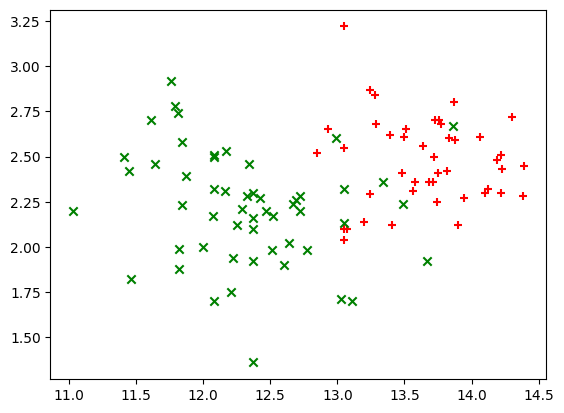

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

MARKERS = ['+','x','.']
COLORS = ['red','green','blue']

def plot_points(xy, labels):
  unqiue_labels = set(labels)
  for i, label in enumerate(set(labels)):
    #filter points for the current label
    points = xy[labels ==  label]
    marker = MARKERS[i % len(MARKERS)]
    color = COLORS[i % len(COLORS)]
    plt.scatter(points[:,0],points[:,1],marker=marker, color=color)

plot_points(X_train, y_train)


#Linear regression
A Linear Regression models seek the line that best fits the training data, which in two-dimensional space is represented as `y = mx + b`. This line is called the hypothesis function. Here, `m` stands for the slope of the line, and `b` represents the y-intercept, the point at which the line crosses the y-axis. The "best fit" is achieved by minimizing the cost function, typically the mean squared error between the predicted values and the actual values in the training set. This process is known as *Linear Least Squares*.


- **Hypothesis Function Linear Regression**:
$$ h_{\theta}(x) = \theta_0 + \theta_1x $$

- **Cost Function Linear Regression**:
$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})^2 $$

  

# Logistic Regression

For logistic regression, we also need a hypothesis function $h_\theta$, a cost function $J(\theta)$, and a gradietn function that computes the partial derivative of $J(\theta)$. In logistic regression the $J(\theta)$. is a sigmoid function that has its y axies essentially bounded by asympotic approach such that for an infinite range of -infinity to +infinity their values can be effectiely mapped to the classes by producing a value that can be interpreted as a probabilty. MSE if applied here, would produce a non-convex shape and this would lead the algorithm to settle in local minima as opposed to the desire global minuma. Hence it is not well suited for gradient descent in this scenario. Instead we use the new cost function depicted below $J(\theta)$.

- **Hypothesis Function Logistic Regression**:
$$
h_\theta(x) = \frac{1}{1 + e^{ \theta^Tx}}
$$


- **Cost Function Logisitc Regression**:
$$
J(\theta) =-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))
$$

Where:
- $\theta_0$ is the y-intercept (b in the simple equation),
- $\theta_1$ is the slope (m in the simple equation),
- $(x^{(i)}, y^{(i)})$ are the training examples,
- $h_{\theta}(x^{(i)})$ is the prediction for training example $x^{(i)}$,
- $m$ is the number of training examples.

Finally, the model's parameters are adjusted during training using optimization algorithms like Gradient Descent to find the values of $\theta_i$ that minimize the cost function $J(\theta_i)$.


-Terminology-

- **Training set** - Data used to train the model.
- **x** - input variable or feature.
- **y** - the "output" variable.
- **m** - the number of training examples.
- **(x,y)** - single training example.
- **(x^{(i)}, y^{(i)})** - the i-th training example in the training set.


Thankfully the derivative of the gradient descent stays the same, with the only differenc being a change in the hypothesis function that is used.

In [17]:
# Creating the sigmoidal (hypothesis function), cost functoin, and gradient
import numpy as np

def sigmoid(X):
  return 1/ (1 + np.exp(-X))

def cost(theta, X, y):
  theta = theta[:,None]
  y = y[:,None]

  hyp = sigmoid(X.dot(theta))
  post = np.multiply(-y, np.log(hyp))
  neg = np.multiply((1-y), np.log(1-hyp))

  return np.sum(pos-neg) / (len(X))

def gradient(theta, X, y):
    theta = theta[:,None]
    y = y[:,None]

    error = sigmoid(X.dot(theta)) - y
    return X.T.dot(error) / len(X)



Instead of manually writing a gradient descent algorithm, an optimization algorithm from Scipy called fmin tnc will perform it. This function takes as parameters the cost function, an initial set of parameters for  θ , the gradient function, and a tuple of args to pass to each.

In [17]:
from scipy.optimize import fmin_tnc

def train(X, y):
    X = np.insert(X, 0, np.ones(len(X)), axis=1)
    theta = np.zeros(X.shape[1])
    result = fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))

    return result[0]

theta = train(X_train, y_train)
print('theta: ', theta)